<a href="https://colab.research.google.com/github/MegaBeing/Airline-reservation/blob/master/ResumeRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personalized Recommendation On Resume Using Generative AI
1. Potential Profile
  2. Recommendation on assignments

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset'

In [4]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: megabeing
Your Kaggle Key: ··········


100%|██████████| 62.5M/62.5M [00:02<00:00, 30.9MB/s]


In [5]:
!pip install pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 5.4 MB/s eta 0:00:00


In [11]:
import os
import numpy as np
import shutil

List the Classes

In [12]:
root_directory = '/content/resume-dataset/data/data'
directories_list = [d for d in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, d))]

# Print the list of directories
print("List of directories in the root directory:")
for directory in directories_list:
    print(directory)


List of directories in the root directory:
CHEF
ADVOCATE
BUSINESS-DEVELOPMENT
AUTOMOBILE
ARTS
FINANCE
TEACHER
DESIGNER
FITNESS
INFORMATION-TECHNOLOGY
SALES
AGRICULTURE
ENGINEERING
BPO
DIGITAL-MEDIA
BANKING
AVIATION
APPAREL
ACCOUNTANT
CONSULTANT
CONSTRUCTION
PUBLIC-RELATIONS
HR
HEALTHCARE


Creation of Train, Val, Test

In [13]:
import pandas as pd

In [167]:
data = pd.read_csv('/content/resume-dataset/Resume/Resume.csv')
data

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [169]:
data.describe()

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


We just Text inside Resume to just classify them into categories

## Data Visualization

In [150]:
import matplotlib.pyplot as plt

In [151]:
resume_per_category = data.groupby(['Category']).count()
resume_per_category

,Resume_str
Category,
ACCOUNTANT,118
ADVOCATE,118
AGRICULTURE,63
APPAREL,97
ARTS,103
AUTOMOBILE,36
AVIATION,117
BANKING,115
BPO,22


### Resume Per Category

<BarContainer object of 24 artists>

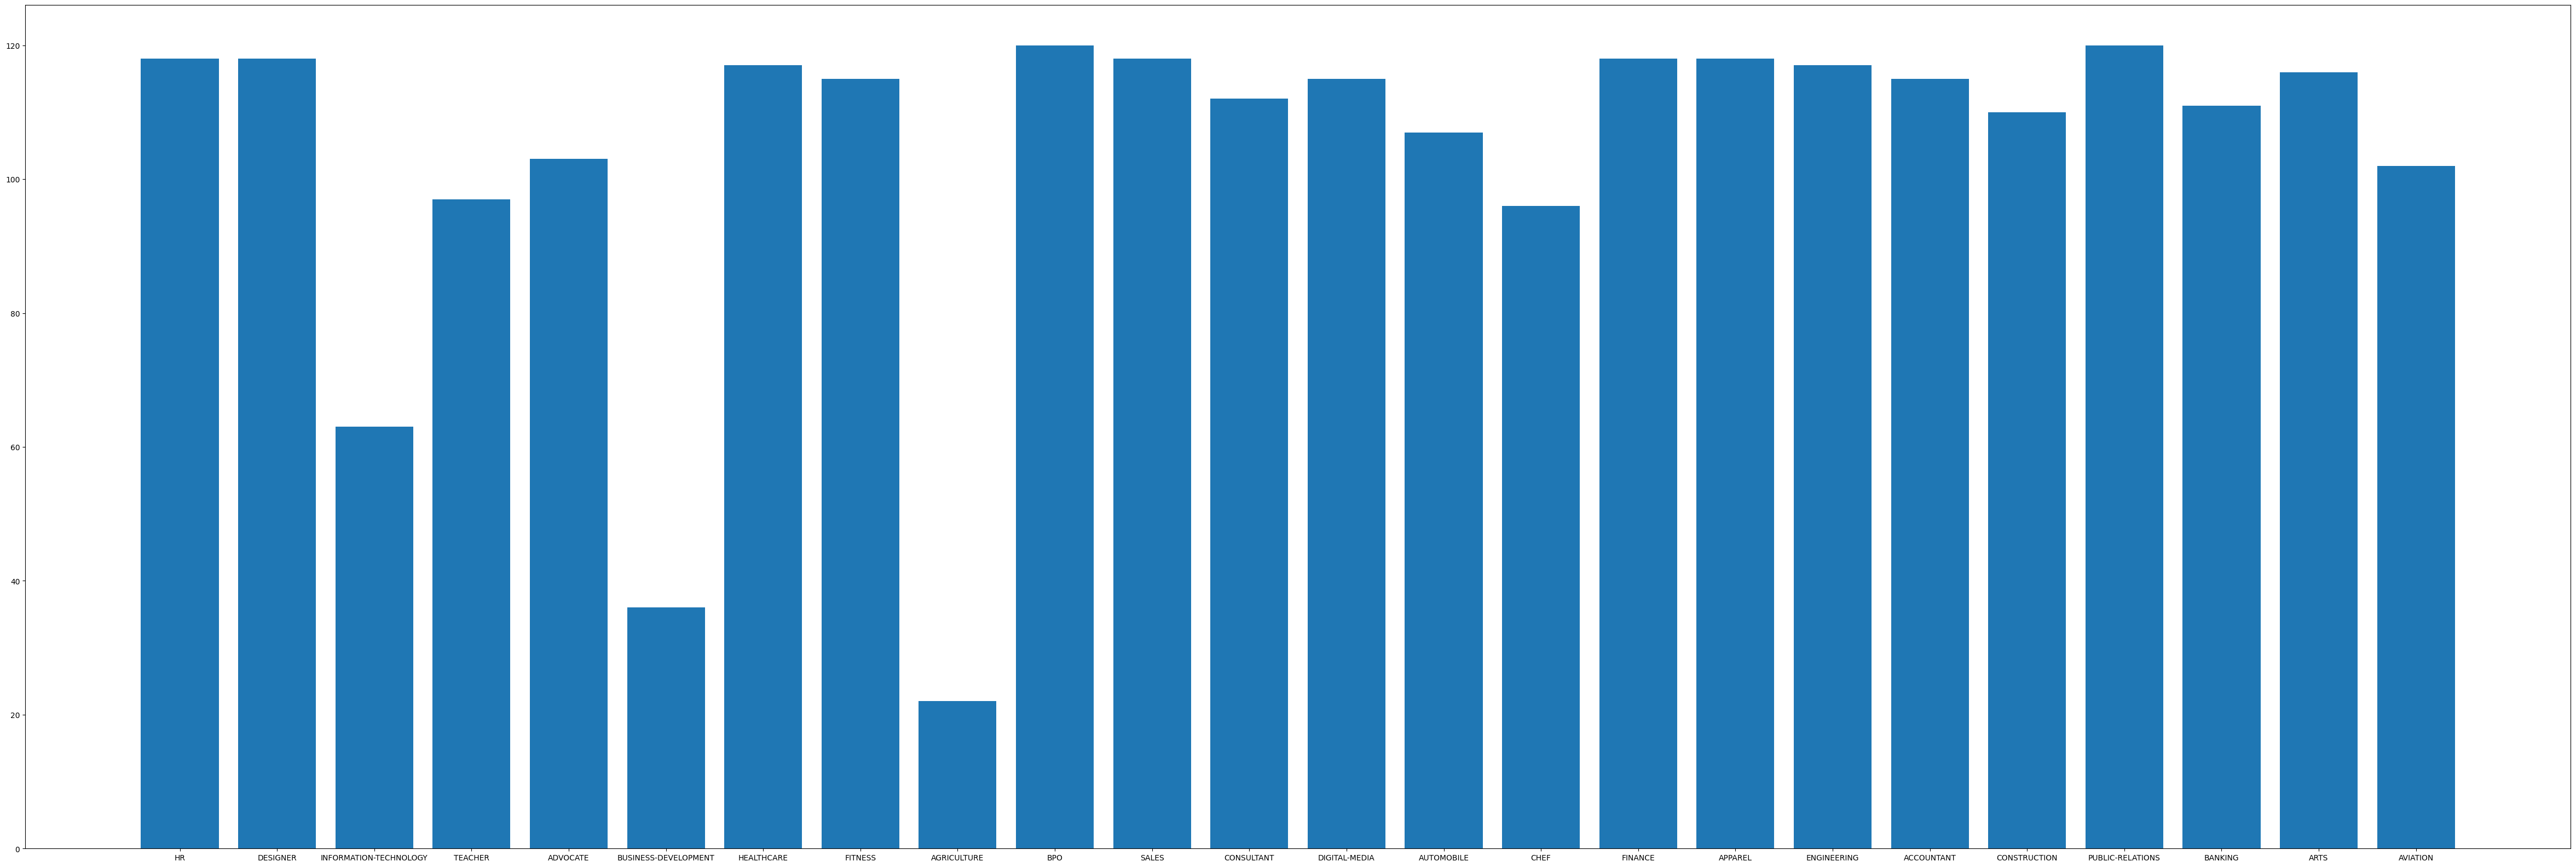

In [152]:
fig,ax = plt.subplots(figsize = (60,20))
ax.bar(data.Category.unique(),resume_per_category['Resume_str'])

# Text Preprocessing

### Testing with one sample

In [33]:
import nltk

In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from pypdf import PdfReader

In [ ]:
reader = PdfReader('/content/resume-dataset/data/data/HR/16852973.pdf')

In [ ]:
len(reader.pages)

2

In [ ]:
page = reader.pages[0]

In [112]:
test = page.extract_text()

In [113]:
print(test)

HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINISTRATOR
Summary
Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.
Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.
Highlights
Focused on customer satisfaction
Team management
Marketing savvy
Conflict resolution techniques
Training and development
Skilled multi-tasker
Client relations specialist
Accomplishments
Missouri DOT Supervisor Training Certification
Certified by IHG in Customer Loyalty and Marketing by Segment
Hilton Worldwide General Manager Training Certification
Accomplished Trainer for cross server hospitality systems such as 
Hilton OnQ
 
, 
Micros 
Opera PMS
 
, Fidelio 
OPERA
 
Reservation
System (ORS)
 , 
Holidex
Completed courses and seminars in customer service, sales strategies, inventory control, loss prevention, safety, time management,
leadership and performance assessment.
Exper

In [114]:
type(test)

str

In [115]:
import re
test = re.sub("\n", " <eol> ", test)
pattern = re.compile(r'[\.,]')
test = re.sub(pattern,'',test)

In [116]:
print(test)

HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINISTRATOR <eol> Summary <eol> Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management <eol> Respected builder and leader of customer-focused teams; strives to instill a shared enthusiastic commitment to customer service <eol> Highlights <eol> Focused on customer satisfaction <eol> Team management <eol> Marketing savvy <eol> Conflict resolution techniques <eol> Training and development <eol> Skilled multi-tasker <eol> Client relations specialist <eol> Accomplishments <eol> Missouri DOT Supervisor Training Certification <eol> Certified by IHG in Customer Loyalty and Marketing by Segment <eol> Hilton Worldwide General Manager Training Certification <eol> Accomplished Trainer for cross server hospitality systems such as  <eol> Hilton OnQ <eol>   <eol>   <eol> Micros  <eol> Opera PMS <eol>   <eol>  Fidelio  <eol> OPERA <eol>   <eol> Reservation <eol> System (ORS) <eol>    <eol> Holidex <eol> C

In [117]:
test = re.split('\s+',test)

In [119]:
test = [w for w in test if not w in stop_words]

In [120]:
print(test)

['HR', 'ADMINISTRATOR/MARKETING', 'ASSOCIATE', 'HR', 'ADMINISTRATOR', '<eol>', 'Summary', '<eol>', 'Dedicated', 'Customer', 'Service', 'Manager', '15+', 'years', 'experience', 'Hospitality', 'Customer', 'Service', 'Management', '<eol>', 'Respected', 'builder', 'leader', 'customer-focused', 'teams;', 'strives', 'instill', 'shared', 'enthusiastic', 'commitment', 'customer', 'service', '<eol>', 'Highlights', '<eol>', 'Focused', 'customer', 'satisfaction', '<eol>', 'Team', 'management', '<eol>', 'Marketing', 'savvy', '<eol>', 'Conflict', 'resolution', 'techniques', '<eol>', 'Training', 'development', '<eol>', 'Skilled', 'multi-tasker', '<eol>', 'Client', 'relations', 'specialist', '<eol>', 'Accomplishments', '<eol>', 'Missouri', 'DOT', 'Supervisor', 'Training', 'Certification', '<eol>', 'Certified', 'IHG', 'Customer', 'Loyalty', 'Marketing', 'Segment', '<eol>', 'Hilton', 'Worldwide', 'General', 'Manager', 'Training', 'Certification', '<eol>', 'Accomplished', 'Trainer', 'cross', 'server', '

> Test Completed
## Now for the whole dataset

In [243]:
cdata = data.drop(['Resume_html','ID'],axis = 1)

In [244]:
cdata

,Resume_str,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR
...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,AVIATION
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...",AVIATION
2481,GEEK SQUAD AGENT Professional...,AVIATION
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,AVIATION


In [245]:
cdata.loc[1]

Resume_str             HR SPECIALIST, US HR OPERATIONS      ...
Category                                                     HR
Name: 1, dtype: object

In [246]:
def clean_data(dta):
  dta = re.sub('\n',' <eol> ',dta)
  dta = re.sub('//','',dta)
  pattern = re.compile(r"[!\"#\$%&\'\(\)\*\+,-\./:;=\?@\[\\\]\^_`{\|}~－]")
  dta = re.sub(pattern,'',dta)
  dta = re.split('\s+',dta)
  dta = [w for w in dta if not w in stop_words and w != '']
  return dta

In [247]:
cdata['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [248]:
for x in range(len(cdata['Resume_str'])):
   cdata['Resume_str'][x]= clean_data(cdata['Resume_str'][x])


In [249]:
cdata['Resume_str'][0]

['HR',
 'ADMINISTRATORMARKETING',
 'ASSOCIATE',
 '<eol>',
 '<eol>',
 'HR',
 'ADMINISTRATOR',
 'Summary',
 'Dedicated',
 'Customer',
 'Service',
 'Manager',
 '15',
 'years',
 'experience',
 'Hospitality',
 'Customer',
 'Service',
 'Management',
 'Respected',
 'builder',
 'leader',
 'customerfocused',
 'teams',
 'strives',
 'instill',
 'shared',
 'enthusiastic',
 'commitment',
 'customer',
 'service',
 'Highlights',
 'Focused',
 'customer',
 'satisfaction',
 'Team',
 'management',
 'Marketing',
 'savvy',
 'Conflict',
 'resolution',
 'techniques',
 'Training',
 'development',
 'Skilled',
 'multitasker',
 'Client',
 'relations',
 'specialist',
 'Accomplishments',
 'Missouri',
 'DOT',
 'Supervisor',
 'Training',
 'Certification',
 'Certified',
 'IHG',
 'Customer',
 'Loyalty',
 'Marketing',
 'Segment',
 'Hilton',
 'Worldwide',
 'General',
 'Manager',
 'Training',
 'Certification',
 'Accomplished',
 'Trainer',
 'cross',
 'server',
 'hospitality',
 'systems',
 'Hilton',
 'OnQ',
 'Micros',
 'Op

In [250]:
cdata

,Resume_str,Category
0,"[HR, ADMINISTRATORMARKETING, ASSOCIATE, <eol>,...",HR
1,"[HR, SPECIALIST, US, HR, OPERATIONS, Summary, ...",HR
2,"[HR, DIRECTOR, Summary, Over, 20, years, exper...",HR
3,"[HR, SPECIALIST, Summary, Dedicated, Driven, D...",HR
4,"[HR, MANAGER, Skill, Highlights, HR, SKILLS, H...",HR
...,...,...
2479,"[RANK, SGTE5, NON, COMMISSIONED, OFFICER, IN, ...",AVIATION
2480,"[GOVERNMENT, RELATIONS, COMMUNICATIONS, AND, O...",AVIATION
2481,"[GEEK, SQUAD, AGENT, Professional, Profile, IT...",AVIATION
2482,"[PROGRAM, DIRECTOR, OFFICE, MANAGER, Summary, ...",AVIATION


In [251]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Resume_str  2484 non-null   object
 1   Category    2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


### Create a Corpus

In [252]:
corpus = set()

In [253]:
for x in cdata['Resume_str']:
  for y in x:
    corpus.add(y)

In [254]:
corpus

{'ProblemSolving',
 'Shippensburg',
 'Netapp',
 'MARKET',
 'objectivesProvided',
 'Vendorscape',
 'PARK',
 'satisfactionManaged',
 '165',
 'crafts',
 'SGV',
 'Softward',
 'DAVID',
 'prayer',
 'foodstuffs',
 'Matrix',
 '465000',
 'WorkerDelivery',
 'phased',
 'Atmosphere',
 'ii',
 'provision',
 'THSCA',
 '3364800',
 'v53',
 'IMPLEMENTATION',
 'Importexport',
 'beginners',
 'DICKINSON',
 'Want',
 'AssociateSmoothie',
 'MathWorks',
 'EEUU',
 'Transact',
 'VxWorks',
 'Cashiering',
 'StrengthToning',
 'Highrisk',
 '3415083',
 'Heritage',
 'franchisees',
 'Persatuan',
 'H',
 'Haiti',
 'OklahomacityOklahoma',
 'basecamp',
 'Centralize',
 'CUNY',
 '041504043004',
 'regulating',
 'aesthetics',
 'ATASCa',
 'forecaster',
 'Titration',
 'Palms',
 'Goulds',
 'daily',
 'AidCPRAED',
 'underwrote',
 'unbilled',
 'Familiarized',
 'Fandango',
 'httpwwwsemperfiglobalcom',
 'semiconductor',
 'injuriesphysical',
 'Fitness',
 'LRVs',
 'PASO',
 'ITNW',
 'better',
 'aspectsconcerns',
 'Iposu',
 '3B',
 'vibran

In [255]:
len(corpus)

70191

That's a Big Number

In [256]:
len(cdata)

2484

Map words to a number bcz neural network only understands number

In [257]:
corpus = list(corpus)

In [258]:
word_to_num = {word: i+1 for i, word in enumerate(corpus)}

In [259]:
word_to_num

{'ProblemSolving': 1,
 'Shippensburg': 2,
 'Netapp': 3,
 'MARKET': 4,
 'objectivesProvided': 5,
 'Vendorscape': 6,
 'PARK': 7,
 'satisfactionManaged': 8,
 '165': 9,
 'crafts': 10,
 'SGV': 11,
 'Softward': 12,
 'DAVID': 13,
 'prayer': 14,
 'foodstuffs': 15,
 'Matrix': 16,
 '465000': 17,
 'WorkerDelivery': 18,
 'phased': 19,
 'Atmosphere': 20,
 'ii': 21,
 'provision': 22,
 'THSCA': 23,
 '3364800': 24,
 'v53': 25,
 'IMPLEMENTATION': 26,
 'Importexport': 27,
 'beginners': 28,
 'DICKINSON': 29,
 'Want': 30,
 'AssociateSmoothie': 31,
 'MathWorks': 32,
 'EEUU': 33,
 'Transact': 34,
 'VxWorks': 35,
 'Cashiering': 36,
 'StrengthToning': 37,
 'Highrisk': 38,
 '3415083': 39,
 'Heritage': 40,
 'franchisees': 41,
 'Persatuan': 42,
 'H': 43,
 'Haiti': 44,
 'OklahomacityOklahoma': 45,
 'basecamp': 46,
 'Centralize': 47,
 'CUNY': 48,
 '041504043004': 49,
 'regulating': 50,
 'aesthetics': 51,
 'ATASCa': 52,
 'forecaster': 53,
 'Titration': 54,
 'Palms': 55,
 'Goulds': 56,
 'daily': 57,
 'AidCPRAED': 58

In [260]:
word_to_num['<PAD>'] = 0

# Convertion of Text Data into Numerical Values

In [261]:
for x in range(len(cdata['Resume_str'])):
  cdata['Resume_str'][x] = [word_to_num[word] for word in cdata['Resume_str'][x]]

In [262]:
cdata

,Resume_str,Category
0,"[61815, 34407, 68264, 3650, 3650, 61815, 13433...",HR
1,"[61815, 45054, 62606, 61815, 31909, 24631, 344...",HR
2,"[61815, 51746, 24631, 23461, 31907, 63517, 434...",HR
3,"[61815, 45054, 24631, 9234, 66472, 58264, 3190...",HR
4,"[61815, 53425, 68641, 13299, 61815, 60780, 618...",HR
...,...,...
2479,"[8868, 4958, 1218, 18743, 32711, 57171, 14385,...",AVIATION
2480,"[17450, 7014, 4339, 35003, 23783, 44666, 51746...",AVIATION
2481,"[11113, 63057, 31344, 35340, 31298, 13652, 443...",AVIATION
2482,"[31487, 51746, 14820, 53425, 24631, 50795, 113...",AVIATION


Add Padding

In [268]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example dataset sentences
sentences = [
    [1, 2, 3],
    [4, 5],
    [6, 7, 8, 9],
]

# Determine maximum length
max_length = max(len(sentence) for sentence in sentences)

# Pad sentences
padded_sentences = pad_sequences(sentences, maxlen=max_length, padding='post')

# Print padded sentences
print("Padded Sentences:")
print(padded_sentences)

# Create mask
mask = (padded_sentences != 0).astype(int)

# Print mask
print("\nMask:")
print(mask)


Padded Sentences:
[[1 2 3 0]
 [4 5 0 0]
 [6 7 8 9]]

Mask:
[[1 1 1 0]
 [1 1 0 0]
 [1 1 1 1]]


In [264]:
for x in cdata['Resume_str']:
  print(len(x))

515
567
764
274
896
516
494
849
597
568
513
804
545
539
562
580
553
864
492
600
470
926
1078
491
570
454
607
543
473
842
605
607
683
1175
555
777
521
881
476
693
523
558
675
621
644
455
693
873
569
315
831
707
897
610
620
660
583
644
777
538
774
843
498
580
539
633
537
698
525
511
537
479
530
521
533
562
522
552
788
516
775
1728
394
783
612
530
522
1348
492
1247
489
965
680
479
2408
794
859
471
464
196
500
661
573
536
752
541
570
526
605
512
414
413
201
537
188
280
824
250
487
701
1069
247
850
838
659
650
872
994
564
659
94
983
565
233
155
537
350
932
565
245
240
581
549
353
457
1165
292
593
931
306
225
192
645
123
570
663
439
231
1686
699
186
538
546
648
341
769
587
577
636
407
555
487
374
406
614
409
291
276
197
545
619
615
1635
776
841
577
411
306
266
414
215
219
676
544
682
589
716
533
635
1136
571
734
757
523
583
623
632
411
1134
534
525
600
560
829
582
372
606
526
632
412
614
431
725
1561
704
816
916
527
892
588
607
553
693
912
1204
549
643
595
652
676
262
684
556
538
1019
545
75

In [266]:
max_length = max_length = max(len(x) for x in cdata['Resume_str'])
max_length

4672

In [267]:
import tensorflow as tf

In [269]:
padded_sentences = pad_sequences(cdata['Resume_str'], maxlen=max_length, padding='post')

In [271]:
len(padded_sentences)

2484

## Splitting for Training, Validation and Testing

In [23]:
x = cdata['Resume_str']
y = cdata['Category']

training = 70%  
validation = 15%  
testing = 15%

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [25]:
x_val,x_test,y_val,y_test = train_test_split(x_test,y_test,test_size = 0.5)

In [26]:
len(x_train), len(x_val), len(x_test)

(1738, 373, 373)